In [3]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


In [4]:
dataset= pd.read_csv('dia.csv')

In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
corr = dataset.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


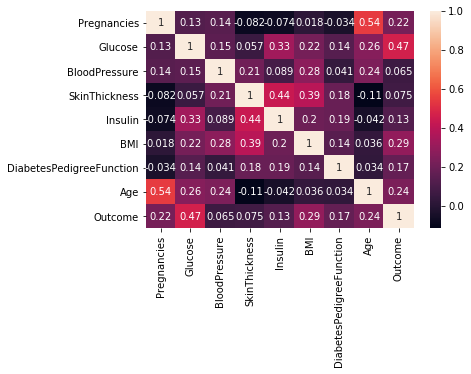

In [7]:
sns.heatmap(corr, annot = True)

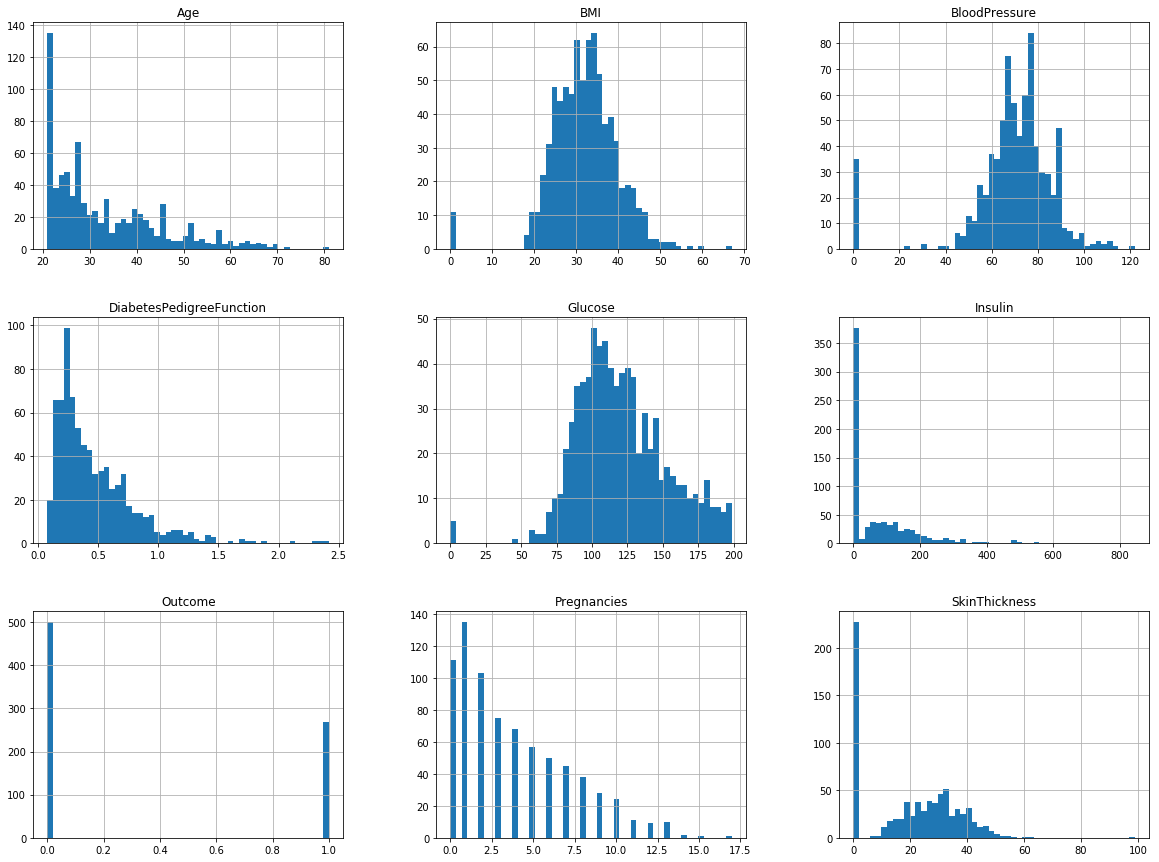

In [8]:
dataset.hist(bins=50, figsize=(20, 15))
plt.show()

In [9]:
# Calculate the median value for BMI
median_bmi = dataset['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
dataset['BMI'] = dataset['BMI'].replace(
    to_replace=0, value=median_bmi)

In [10]:
# Calculate the median value for BloodP
median_bloodp = dataset['BloodPressure'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
dataset['BloodPressure'] = dataset['BloodPressure'].replace(
    to_replace=0, value=median_bloodp)

In [11]:
# Calculate the median value for PlGlcConc
median_plglcconc = dataset['Glucose'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
dataset['Glucose'] = dataset['Glucose'].replace(
    to_replace=0, value=median_plglcconc)

In [12]:
# Calculate the median value for SkinThick
median_skinthick = dataset['SkinThickness'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
dataset['SkinThickness'] = dataset['SkinThickness'].replace(
    to_replace=0, value=median_skinthick)

In [13]:
# Calculate the median value for TwoHourSerIns
median_twohourserins = dataset['Insulin'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
dataset['Insulin'] = dataset['Insulin'].replace(
    to_replace=0, value=median_twohourserins)

In [14]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [15]:
X=dataset.drop("Outcome",axis=1)

In [16]:
y=dataset.Outcome

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [18]:
columns=x_train.columns

In [21]:
# Import Naive Bayes machine learning library
from sklearn.naive_bayes import GaussianNB

#Import the metrics
from sklearn import metrics
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [22]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
model=GaussianNB()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [24]:
model_score = model.score(x_test, y_test)
print('Model score :',model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test,pred))

Model score : 0.7532467532467533
Confusion Matrix:
 [[137  20]
 [ 37  37]]


In [25]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc

In [28]:
print('Accuracy :',metrics.accuracy_score(y_test,pred))
print('Precision :',metrics.precision_score(y_test,pred))
print('Recall :',metrics.recall_score(y_test,pred))
print('F-score :',metrics.f1_score(y_test,pred))

Accuracy : 0.7532467532467533
Precision : 0.6491228070175439
Recall : 0.5
F-score : 0.5648854961832062


In [29]:
print(metrics.classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       157
          1       0.65      0.50      0.56        74

avg / total       0.74      0.75      0.74       231

